In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Q1

#### [A] Use Pandas to load the data from Wage.csv

In [2]:
# Import data
data = pd.read_csv('Wage.csv')

In [3]:
data.head(10)

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,450601,2009,44,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,377954,2008,30,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,228963,2006,41,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,81404,2004,52,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


In [4]:
data.shape

(3000, 12)

#### [B] Create a scatter plot comparing wage to age.

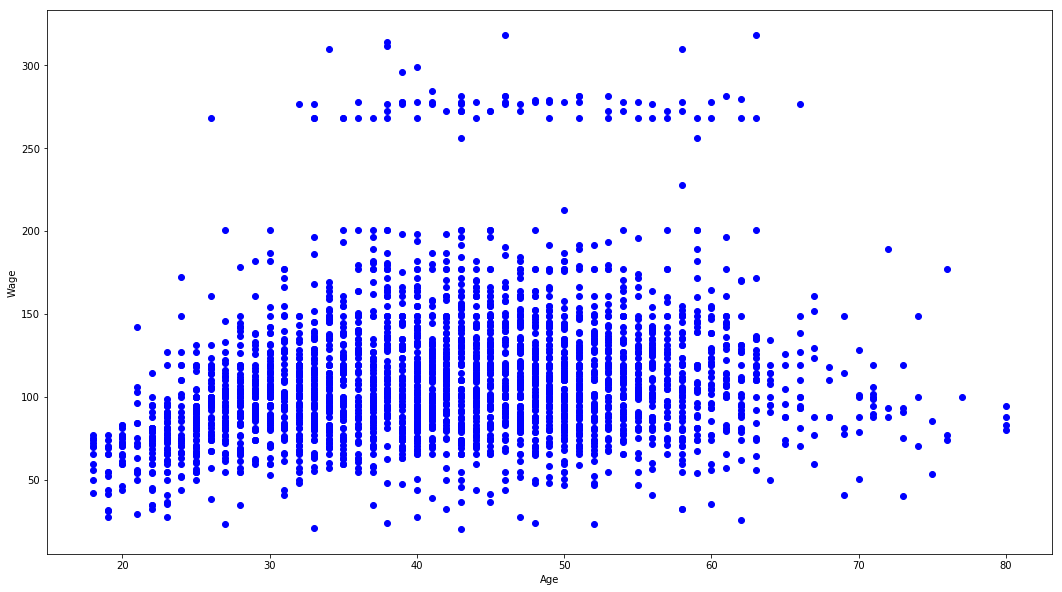

In [5]:
# data.plot.scatter('age', 'wage')
plt.figure(figsize=(18,10))
plt.scatter(data['age'], data['wage'], color='b')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()

#### [C] Does there appear to be a relationship?

>There appears to be <b>a non-linear relationship</b> between age and wage. At age <=20, wages are low and as we progress (35 < age < 60), wages are significanly high.

## Q2 Use sklearn.model_selection.train_test_split to set aside 20% of the data as a test set.


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)

In [8]:
train_data.head(5)

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
2370,87217,2004,33,2. Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.653213,104.921507
1774,453420,2009,47,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.029384,152.838801
731,231608,2006,47,4. Divorced,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.161368,174.402876
271,304988,2007,48,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.698970,109.833986
1077,82525,2004,50,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.963788,143.134941


In [9]:
train_data.shape

(2400, 12)

In [10]:
test_data.shape

(600, 12)

# Q3

#### [A] Use sklearn.linear_model.LinearRegression to fit wage as a function of age. 

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regressor = LinearRegression(normalize=True)

In [13]:
# Spliting dataset for input features and target elements
x_train_data, t_train_data = train_data['age'], train_data['wage']
x_test_data, t_test_data = test_data['age'], test_data['wage']

In [14]:
x_train_data[:5], t_train_data[:5]

(2370    33
 1774    47
 731     47
 271     48
 1077    50
 Name: age, dtype: int64, 2370    104.921507
 1774    152.838801
 731     174.402876
 271     109.833986
 1077    143.134941
 Name: wage, dtype: float64)

In [15]:
x_test_data[:5], t_test_data[:5]

(311     45
 1025    32
 1587    34
 2941    47
 2980    40
 Name: age, dtype: int64, 311     118.884359
 1025    115.375039
 1587    123.089700
 2941    105.927811
 2980     70.476020
 Name: wage, dtype: float64)

In [16]:
# Fitting model
regressor.fit(x_train_data[:,np.newaxis], t_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

#### [B] List the coefficients of the model

In [17]:
# Coefficient (w1)
print('Coefficient [w1]= ',regressor.coef_[0])

Coefficient [w1]=  0.6825955717600367


#### [C] plot the line against the scatterplot from experiment (1) above.

Text(0,0.5,'Wage')

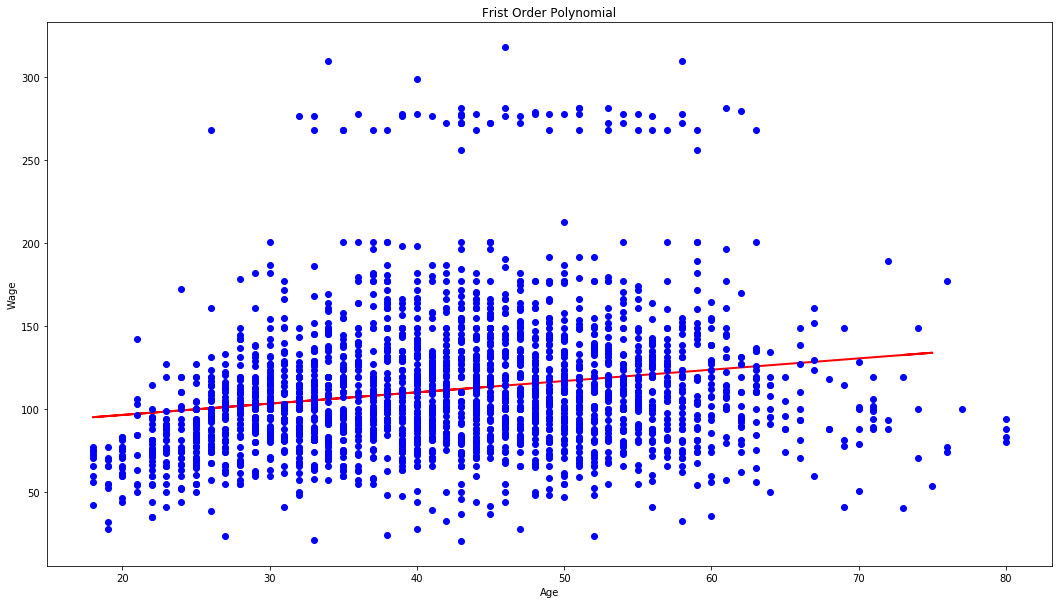

In [18]:
plt.figure(figsize=(18,10))
plt.plot(x_test_data,regressor.predict(x_test_data[:,np.newaxis]),'r-',linewidth=2)
plt.plot(x_train_data,t_train_data,'bo')
plt.title('Frist Order Polynomial')
plt.xlabel('Age')
plt.ylabel('Wage')

## Q4

#### [A] Predict wages for each of the items in your test set

In [19]:
# Predicting against the test data
t_test_pred = regressor.predict(x_test_data[:,np.newaxis])

In [20]:
t_test_pred[:5], t_test_data[:5]

(array([113.28187291, 104.40813047, 105.77332162, 114.64706405,
        109.86889505]), 311     118.884359
 1025    115.375039
 1587    123.089700
 2941    105.927811
 2980     70.476020
 Name: wage, dtype: float64)

#### [B] score them against the targets. What does R2 tell you about how well the model fits the data?

In [21]:
# R^2 (Coefficient of Determination) of the model
prediction_score = regressor.score(x_test_data[:,np.newaxis], t_test_data)
print('R^2= ',prediction_score)

R^2=  0.04038894268488691


> As the R^2 (Coefficient of Determination) value is close to 0, it means the linear model is loosely fit.

## Q5

#### [A] Use sklearn.preprocessing.PolynomialFeatures along with LinearRegression to fit a 4th order polynomial to the same data.

In [22]:
# Importing Polynomail Features class
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=4)

In [23]:
# Fit and transform input features values --> train data
x_train_data_poly = poly.fit_transform(x_train_data[:,np.newaxis])

In [24]:
# Fit and transform input feature values --> test data
x_test_data_poly = poly.fit_transform(x_test_data[:,np.newaxis])

In [25]:
# Regressor for ploynomial features
regressor_poly = LinearRegression(normalize=True)

In [26]:
# Fit target values
regressor_poly.fit(x_train_data_poly,t_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [27]:
# Coefficients
print('Coefficients=', regressor_poly.coef_)

Coefficients= [ 0.00000000e+00  1.63753117e+01 -4.12606718e-01  4.83015419e-03
 -2.27569012e-05]


#### [B] Plot the resulting polynomial, and compare R2 to the previous model.

In [28]:
x_test_4 = np.linspace(x_train_data.min(),x_train_data.max(),x_train_data.size)[:,None]
X_test_4 = np.ones_like(x_test_4)
for i in range(1,5):
    X_test_4 = np.column_stack((X_test_4,x_test_4**i))
# X_test = np.hstack((X_test,np.sin(x_test)))
f_test_4 = np.dot(X_test_4,regressor_poly.coef_)

Text(0,0.5,'Wage')

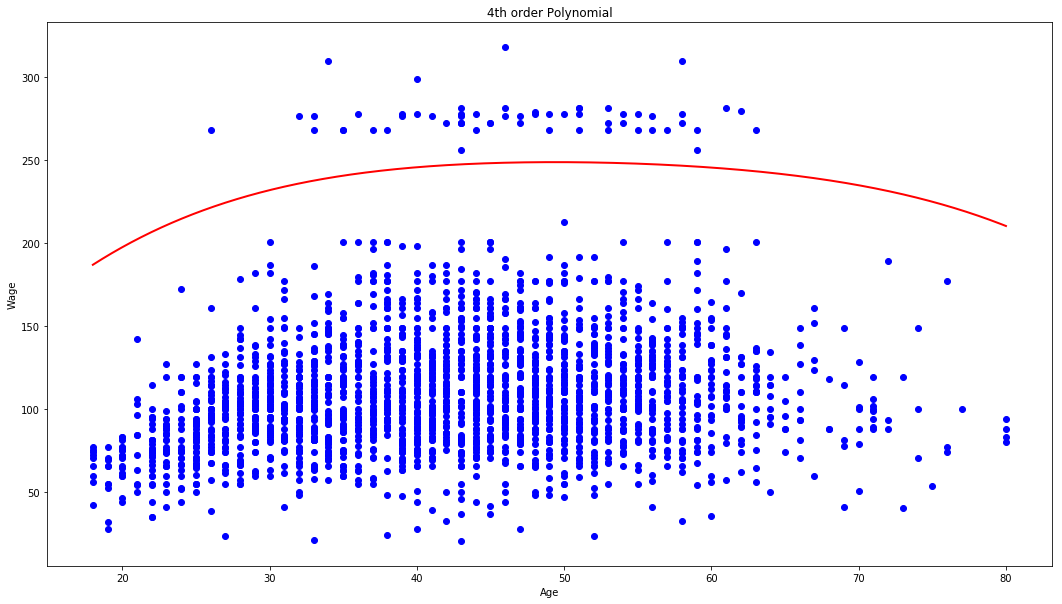

In [29]:
plt.figure(figsize=(18,10))
plt.plot(x_test_4,f_test_4,'r-',linewidth=2)
plt.plot(x_train_data,t_train_data,'bo')
plt.title('4th order Polynomial')
plt.xlabel('Age')
plt.ylabel('Wage')

In [30]:
# R^2 (Coefficient of Determination) of the model
prediction_score_poly_4 = regressor_poly.score(x_test_data_poly, t_test_data)
print('R^2= ',prediction_score_poly_4)

R^2=  0.09686891049146495


>Even though R^2 value is improved than the previous model, it is close to 0. Which means the model is still loosely fitted

## Q6

In [31]:
from sklearn.linear_model import Ridge

In [32]:
# Ridge regularization model
# alpha = 0.1
ridge_clf = Ridge(alpha=0.1, fit_intercept=True, normalize=True,random_state=None)

In [33]:
# Fitting the model
ridge_clf.fit(x_train_data_poly,t_train_data)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [34]:
# Coefficients
print("Coefficients= ", ridge_clf.coef_)

Coefficients=  [ 0.00000000e+00  1.05525757e+00  3.95077597e-03 -3.68799179e-05
 -1.54825969e-06]


In [35]:
# R^2 (Coefficient of Determination) of the model
prediction_score_poly_4_ridge = ridge_clf.score(x_test_data_poly,t_test_data)
print('R^2 = ',prediction_score_poly_4_ridge)

R^2 =  0.06044913571647892


# Q7

In [36]:
from sklearn.linear_model import RidgeCV

In [37]:
# Various alpha hyperparameter values to try out
# Best alpha value will be used for regularization
alpha_values = (0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.1, 0.2, 0.4,1.0)

In [38]:
regressor_ridge_cv = RidgeCV(alphas=alpha_values, fit_intercept=True, normalize=True)

In [39]:
# Fit the model to the 4th order plynomial using various alpha values
regressor_ridge_cv.fit(x_train_data_poly, t_train_data)

RidgeCV(alphas=(0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.1, 0.2, 0.4, 1.0),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring=None, store_cv_values=False)

In [40]:
# returns the best alpha value from the given range
print("Best alpha value= ",regressor_ridge_cv.alpha_)

Best alpha value=  0.001


In [41]:
# R^2 (Coefficient of Determination) of the model
prediction_score_poly_4_ridge_cv =regressor_ridge_cv.score(x_test_data_poly, t_test_data)
print("R^2= ",prediction_score_poly_4_ridge_cv)

R^2=  0.08655054567325926


## Q8

In [42]:
#Only select object type variables 
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

,maritl,race,education,region,jobclass,health,health_ins
0,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No
1,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No
2,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes
3,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes
4,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes


In [43]:
print(obj_df['maritl'].value_counts().count())

5


In [44]:
# # APPROACH 1: Label encoding
# obj_sklearn = data.copy()

# from sklearn.preprocessing import LabelEncoder

# lb_make = LabelEncoder()
# obj_sklearn['maritl'] = lb_make.fit_transform(data['maritl'])
# obj_sklearn['race'] = lb_make.fit_transform(data['race'])
# obj_sklearn['education'] = lb_make.fit_transform(data['education'])
# obj_sklearn['region'] = lb_make.fit_transform(data['region'])
# obj_sklearn['jobclass'] = lb_make.fit_transform(data['jobclass'])
# obj_sklearn['health'] = lb_make.fit_transform(data['health'])
# obj_sklearn['health_ins'] = lb_make.fit_transform(data['health_ins'])




# obj_sklearn.head() #Results in appending a new column to df

In [45]:
#APPROACH 2: one_hot  encoding
obj_onehot = data.copy()
obj_onehot = pd.get_dummies(obj_onehot, columns=['maritl'], prefix = ['maritl'])
obj_onehot = pd.get_dummies(obj_onehot, columns=['race'], prefix = ['race'])
obj_onehot = pd.get_dummies(obj_onehot, columns=['region'], prefix = ['region'])
obj_onehot = pd.get_dummies(obj_onehot, columns=['education'], prefix = ['education'])
obj_onehot = pd.get_dummies(obj_onehot, columns=['jobclass'], prefix = ['jobclass'])
obj_onehot = pd.get_dummies(obj_onehot, columns=['health'], prefix = ['health'])
obj_onehot = pd.get_dummies(obj_onehot, columns=['health_ins'], prefix = ['health_ins'])



print(obj_onehot.head())


   Unnamed: 0  year  age   logwage        wage  maritl_1. Never Married  \
0      231655  2006   18  4.318063   75.043154                        1   
1       86582  2004   24  4.255273   70.476020                        1   
2      161300  2003   45  4.875061  130.982177                        0   
3      155159  2003   43  5.041393  154.685293                        0   
4       11443  2005   50  4.318063   75.043154                        0   

   maritl_2. Married  maritl_3. Widowed  maritl_4. Divorced  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  1                  0                   0   
3                  1                  0                   0   
4                  0                  0                   1   

   maritl_5. Separated        ...         education_2. HS Grad  \
0                    0        ...                            0   
1                    0        ...     

In [46]:
corr = obj_onehot.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# plt.matshow(obj_sklearn.corr())
# plt.show()

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Unnamed: 0,year,age,logwage,wage,maritl_1. Never Married,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,race_1. White,race_2. Black,race_3. Asian,race_4. Other,region_2. Middle Atlantic,education_1. < HS Grad,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,jobclass_1. Industrial,jobclass_2. Information,health_1. <=Good,health_2. >=Very Good,health_ins_1. Yes,health_ins_2. No
Unnamed: 0,1,0.84,0.045,0.052,0.05,0.0091,0.00079,-0.032,-0.0096,0.0062,-0.025,-0.00085,0.041,-0.0032,nan,0.018,0.0017,-0.033,-0.0016,0.024,0.021,-0.021,-0.0051,0.0051,-0.015,0.015
year,0.84,1,0.038,0.076,0.066,0.017,-0.0087,-0.025,-0.01,0.012,-0.036,0.022,0.03,-0.0004,nan,-0.004,0.0053,-0.025,0.0012,0.024,0.0062,-0.0062,0.0019,-0.0019,-0.0081,0.0081
age,0.045,0.038,1,0.22,0.2,-0.45,0.32,0.058,0.12,0.017,-0.0038,0.033,-0.013,-0.046,nan,-0.017,-0.012,-0.07,0.017,0.091,-0.091,0.091,0.14,-0.14,0.14,-0.14
logwage,0.052,0.076,0.22,1,0.95,-0.27,0.28,-0.019,-0.054,-0.03,0.048,-0.078,0.049,-0.065,nan,-0.23,-0.26,-0.027,0.18,0.35,-0.21,0.21,-0.16,0.16,0.37,-0.37
wage,0.05,0.066,0.2,0.95,1,-0.24,0.26,-0.023,-0.055,-0.034,0.045,-0.08,0.054,-0.058,nan,-0.21,-0.26,-0.05,0.17,0.38,-0.21,0.21,-0.15,0.15,0.31,-0.31
maritl_1. Never Married,0.0091,0.017,-0.45,-0.27,-0.24,1,-0.79,-0.042,-0.14,-0.072,-0.07,0.087,-0.01,0.029,nan,0.012,0.016,0.046,-0.0096,-0.074,0.038,-0.038,0.0012,-0.0012,-0.097,0.097
maritl_2. Married,0.00079,-0.0087,0.32,0.28,0.26,-0.79,1,-0.12,-0.4,-0.2,0.058,-0.1,0.049,-0.03,nan,-0.029,-0.031,-0.05,0.023,0.096,-0.031,0.031,-0.04,0.04,0.075,-0.075
maritl_3. Widowed,-0.032,-0.025,0.058,-0.019,-0.023,-0.042,-0.12,1,-0.022,-0.011,-0.041,0.03,0.014,0.029,nan,0.0045,0.017,-0.022,0.0066,-0.0084,0.019,-0.019,0.015,-0.015,0.0074,-0.0074
maritl_4. Divorced,-0.0096,-0.01,0.12,-0.054,-0.055,-0.14,-0.4,-0.022,1,-0.037,0.033,0.0093,-0.065,0.0058,nan,-0.01,0.02,0.025,-0.018,-0.026,-0.0053,0.0053,0.061,-0.061,0.027,-0.027
maritl_5. Separated,0.0062,0.012,0.017,-0.03,-0.034,-0.072,-0.2,-0.011,-0.037,1,-0.023,0.055,-0.025,-0.015,nan,0.079,0.012,-0.0055,-0.021,-0.048,-0.011,0.011,0.012,-0.012,-0.017,0.017


> We are adding <b>education</b> and <b>logwage</b> features to input feature and computing regression

In [47]:
obj_onehot.columns

Index(['Unnamed: 0', 'year', 'age', 'logwage', 'wage',
       'maritl_1. Never Married', 'maritl_2. Married', 'maritl_3. Widowed',
       'maritl_4. Divorced', 'maritl_5. Separated', 'race_1. White',
       'race_2. Black', 'race_3. Asian', 'race_4. Other',
       'region_2. Middle Atlantic', 'education_1. < HS Grad',
       'education_2. HS Grad', 'education_3. Some College',
       'education_4. College Grad', 'education_5. Advanced Degree',
       'jobclass_1. Industrial', 'jobclass_2. Information', 'health_1. <=Good',
       'health_2. >=Very Good', 'health_ins_1. Yes', 'health_ins_2. No'],
      dtype='object')

##### Linear Regression using Age and Logwage as input features and Wage as target feature

In [48]:
# New dataset featuring logwage column
new_data = obj_onehot.loc[:, ['logwage','age','education_1. < HS Grad', 'education_2. HS Grad', 'education_3. Some College',
       'education_4. College Grad', 'education_5. Advanced Degree','wage']]
new_data.head(5)

,logwage,age,education_1. < HS Grad,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,wage
0,4.318063,18,1,0,0,0,0,75.043154
1,4.255273,24,0,0,0,1,0,70.476020
2,4.875061,45,0,0,1,0,0,130.982177
3,5.041393,43,0,0,0,1,0,154.685293
4,4.318063,50,0,1,0,0,0,75.043154


In [49]:
# SPlitting dataset into train and test datasets
train_data, test_data = train_test_split(new_data, test_size=0.2, random_state=0)

In [50]:
train_data.shape

(2400, 8)

In [51]:
test_data.shape

(600, 8)

In [52]:
# Splitting train and test datasets into \
# input features (logwage and age) and target (wage)
x_train_data, t_train_data = train_data[['logwage', 'age','education_1. < HS Grad', 'education_2. HS Grad', 'education_3. Some College',
       'education_4. College Grad', 'education_5. Advanced Degree']], train_data['wage']
x_test_data, t_test_data = test_data[['logwage', 'age','education_1. < HS Grad', 'education_2. HS Grad', 'education_3. Some College',
       'education_4. College Grad', 'education_5. Advanced Degree']], test_data['wage']

In [53]:
# New linear regressor
regressor = LinearRegression(normalize=True)

In [54]:
# Fit the model
regressor.fit(x_train_data, t_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [55]:
t_test_pred = regressor.predict(x_test_data)

In [56]:
# R^2 (Coefficient of Determination) of the model
prediction_score = regressor.score(x_test_data, t_test_data)
print('R^2= ',prediction_score)

R^2=  0.8922820471442342


>As we can see, R^2 value improves as we add logwage to the model.
It is much close to 1, which means the model is closely fitted